# Pre-processing - Training

## Loader le contexte

In [136]:
# import them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA, FastICA, TruncatedSVD, NMF


In [ ]:
#df = pd.read_csv("./results/df_cleaned.csv")
df = pd.read_csv("./results/textual_data_processed.csv")

## Normalisation

* Min-Max Scaling

Utilisation : Utile lorsque les données doivent être bornées dans un intervalle spécifique.

* Standardisation

Utilisation : Utile lorsque les données suivent une distribution normale et que l'on souhaite centrer les données autour de zéro.

* Normalisation Robuste

Utilisation : Utile lorsque les données contiennent des valeurs aberrantes.

* MaxAbs Scaling

Utilisation : Utile pour les données sparse (par exemple, les matrices de termes-documents en traitement du langage naturel).

* Normalisation Logarithmique

Utilisation : Utile lorsque les données ont une distribution exponentielle ou contiennent des valeurs très grandes.

### Min-Max Scaling 

In [138]:
#Min Max scaler (on conserve le modèle pour pouvoir le réutiliser sur les données de test plus tard)
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(df)
df = pd.DataFrame(min_max_scaler.transform(df), columns=df.columns)
df.describe()



Model Year  Test Veh Displacement (L)  Rated Horsepower  \
count  33031.00000               33031.000000      33031.000000   
mean       0.48431                   0.298190          0.198045   
std        0.30549                   0.160928          0.098946   
min        0.00000                   0.000000          0.000000   
25%        0.25000                   0.179487          0.122081   
50%        0.50000                   0.243590          0.182789   
75%        0.75000                   0.371795          0.240827   
max        1.00000                   1.000000          1.000000   

       Number of Cylinders and Rotors  Number of Gears  \
count                    33031.000000     33031.000000   
mean                         0.238099         0.628988   
std                          0.127118         0.300642   
min                          0.000000         0.000000   
25%                          0.142857         0.555556   
50%                          0.142857         0.777778   
75%                          0.285714         0.777778   
max                          1.000000         1.000000   

       Transmission Overdrive Code    Axle Ratio     N/V Ratio  \
count                 33031.000000  33031.000000  33031.000000   
mean                      0.986649      0.248251      0.223418   
std                       0.114775      0.090806      0.049473   
min                       0.000000      0.000000      0.000000   
25%                       1.000000      0.198520      0.194309   
50%                       1.000000      0.231813      0.213008   
75%                       1.000000      0.274969      0.242276   
max                       1.000000      1.000000      1.000000   

       Shift Indicator Light Use Cd  Test Procedure Cd  ...  \
count                  33031.000000       33031.000000  ...   
mean                       0.023872           0.241053  ...   
std                        0.126664           0.318897  ...   
min                        0.000000           0.000000  ...   
25%                        0.000000           0.010753  ...   
50%                        0.000000           0.204301  ...   
75%                        0.000000           0.204301  ...   
max                        1.000000           1.000000  ...   

       grammes equivalent CO2/km     Fuel type  Number of wheel  \
count               33031.000000  33031.000000     33031.000000   
mean                    0.296817      0.511535         0.209591   
std                     0.113523      0.117156         0.407023   
min                     0.000000      0.000000         0.000000   
25%                     0.212955      0.500000         0.000000   
50%                     0.277410      0.500000         0.000000   
75%                     0.358614      0.500000         0.000000   
max                     1.000000      1.000000         1.000000   

       Equivalent Test Weight (kg)    Gear ratio  Veh Mfr Code Mean Encoding  \
count                 33031.000000  33031.000000                33031.000000   
mean                      0.434932      0.013351                    0.577804   
std                       0.184037      0.114775                    0.094114   
min                       0.000000      0.000000                    0.000000   
25%                       0.297297      0.000000                    0.494790   
50%                       0.405405      0.000000                    0.562987   
75%                       0.567568      0.000000                    0.659622   
max                       1.000000      1.000000                    1.000000   

       Transmission Type Mean Encoding  Rear Type_0.0  Rear Type_0.1  \
count                     33031.000000   33031.000000   33031.000000   
mean                          0.885963       0.425176       0.365233   
std                           0.192197       0.494377       0.481503   
min                           0.000000       0.000000       0.000000   
25%                           0.8

### Standardisation

In [139]:
# Nos donnnées ne sont pas noramlement distribuées, donc on ne peut pas utiliser le standard scaler
if False:
    # Normaliser les données (même chose que pour le min max scaler)
    standard_scaler = StandardScaler()
    standard_scaler.fit(df)
    X_standard = standard_scaler.transform(df)

## Data Reduction

### Visualiser

* On tente d'intuiter les relations pour ensuite les traiter et réduire la dimensiosn

In [140]:
sns.pairplot(df)

__Combinaisons linéaire__
* Test Veh Displacement X rated horspower (linéaire)
* RND_ADF_FE X Test Veh Displacement (|rated horspower) ~exp
* RND_ADF_FE X litre pour 100 km
* DT-Absolute Speed Change Ratg X DT-Inertia Work Ratio Rating
* Set COef C ... X Target Coeff C
__Combinaisons non-linéaire__
* None

### Trouver une relation entre les features

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Matrix Heatmap", fontsize=15)

#### Relations linéaires entre les variables

* PCA

Réduire les variables à quelques variables principales en conservant toute la variances des données (autrement dit on retire toutes les corrélations)

Agit lorsque des variables sont corrélés et on peut l'appliquer une fois que les distributions ont été normalisées
Très efficace pour préparer à du clustering ou de la classification
* SVD

même utilisation que le PCA
* LDA

Maximise la séparation entre les classes. Très efficace en classification supervisée en amont d'un algo de ML (SVM, K-NN). 
En amont les catégories doivent être normalisées ou linéarisées.

##### PCA

In [141]:
df_PCA = df.drop(columns=["grammes equivalent CO2/km"])

In [142]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca.fit(df_PCA)
pca.components_

array([[-0.08402611, -0.12401027, -0.08856475, -0.10237208, -0.26184545,
         0.00997324,  0.03466175,  0.01338863, -0.01295515,  0.01035313,
         0.02873245,  0.00080336,  0.00072368,  0.00322974, -0.13292044,
        -0.028891  , -0.05937083,  0.004487  , -0.00101371, -0.01449798,
        -0.08902053, -0.17008668, -0.01177995, -0.35878528, -0.17008668,
        -0.00997324, -0.06120267, -0.15581318,  0.65371352, -0.29492824,
        -0.35878528],
       [-0.1277068 ,  0.05565771,  0.02448359,  0.03393826,  0.05474754,
         0.01408441, -0.00908497,  0.00465163,  0.01562806, -0.07000337,
        -0.006962  ,  0.00388148,  0.00269875,  0.00069534,  0.00731989,
         0.01654492,  0.00480425,  0.05562883,  0.00989265,  0.00290072,
         0.01849545,  0.01719225,  0.00412652, -0.48936804,  0.01719225,
        -0.01408441,  0.00800082,  0.04455263, -0.18244277,  0.67181081,
        -0.48936804]])

C:\Users\marcl\AppData\Local\Temp\ipykernel_2084\3059764975.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


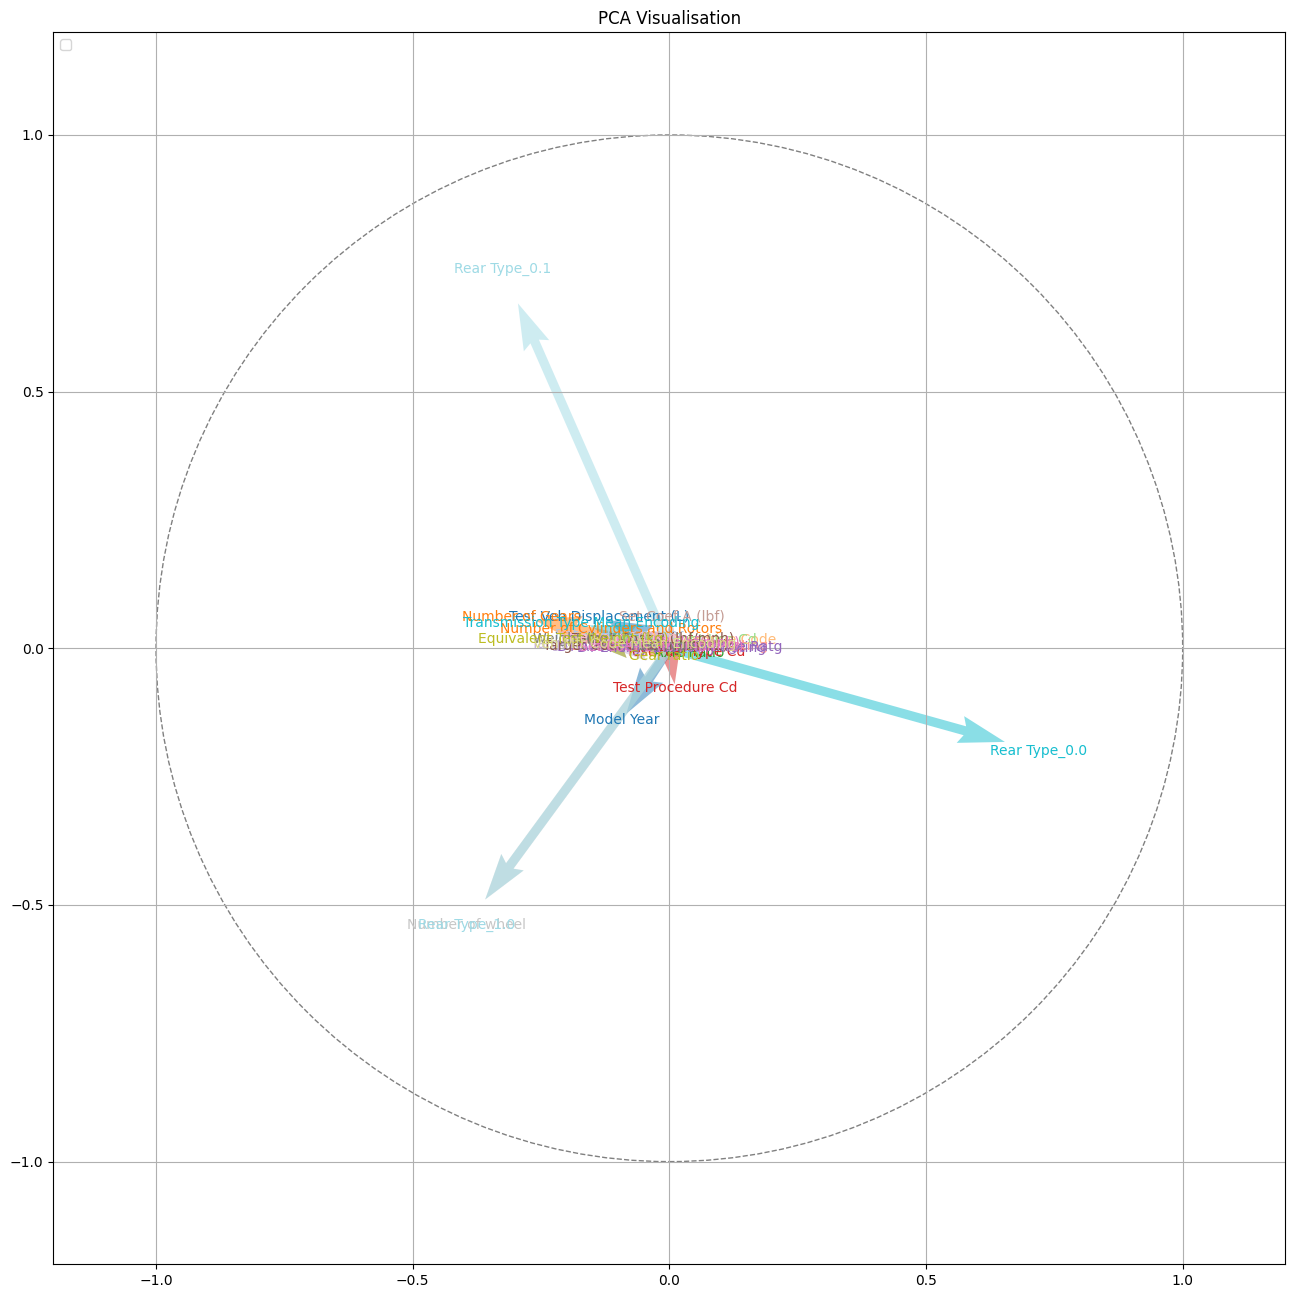

In [143]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming pca and df_PCA are already defined

# Plotting
plt.figure(figsize=(16, 16))
ax = plt.gca()

# Plot unit circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)

# Plot the vectors
cmap = plt.get_cmap('tab20')
norm = mcolors.Normalize(vmin=0, vmax=pca.components_.shape[1] - 1)

for i in range(pca.components_.shape[1]):
    ax.quiver(0, 0, pca.components_[0, i], pca.components_[1, i], angles='xy', scale_units='xy', scale=1, color=cmap(norm(i)), alpha=0.5)
    ax.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, df_PCA.columns[i], color=cmap(norm(i)), ha='center', va='center')

# Setting the aspect ratio of the plot to be equal
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_aspect('equal')

# Add labels and title
plt.legend(loc='upper left')
plt.title("PCA Visualisation")

# Show the plot
plt.grid(True)
plt.show()


####  Relations non-linéaires entre les variables

* Kernel PCA

Elle projette les données dans un espace de plus haute dimension via une fonction noyau, puis applique PCA dans cet espace.

Très adapté pour du clustering

* Isomap

Elle construit un graphe de voisinage pour capturer la structure manifold des données, puis utilise la décomposition en valeurs singulières (SVD) pour réduire la dimensionnalité.
* t-SNE

Ardu à comprendre en détail

L'objectif de t-SNE est de minimiser la divergence de Kullback-Leibler entre les distributions de probabilité de similarité dans l'espace de haute dimension et celles dans l'espace de faible dimension.

##### Kernel PCA

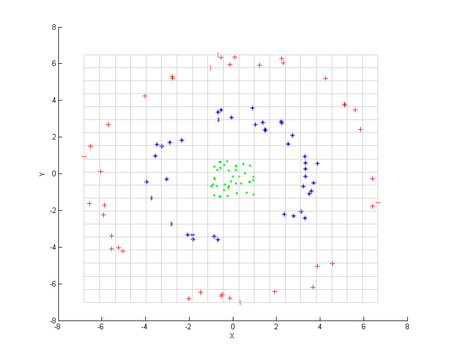
--> 
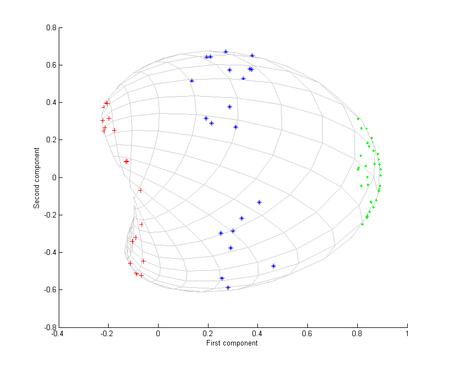

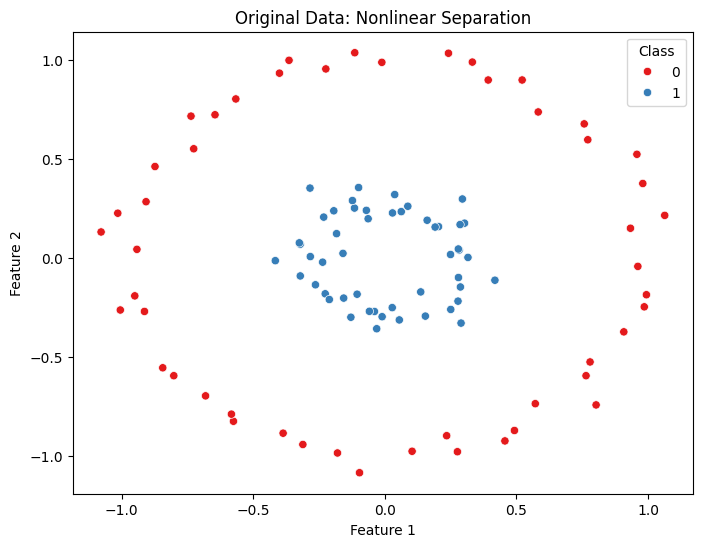

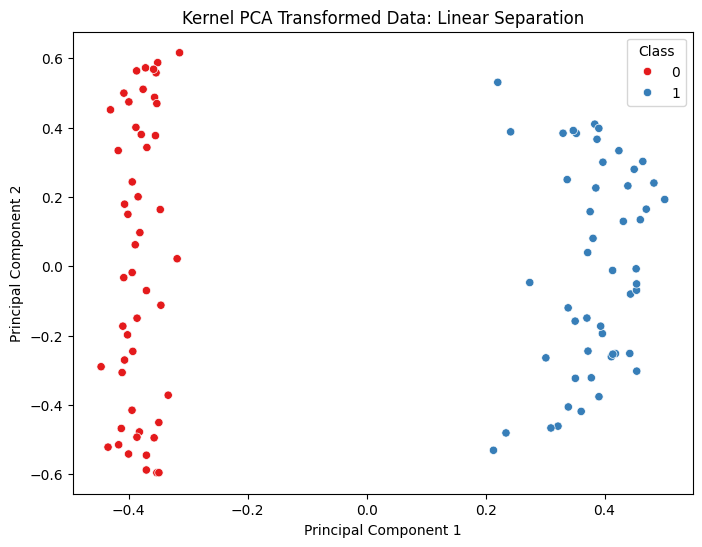

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
# Set random seed for reproducibility
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data: two interleaving half circles
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=0.3, noise=0.05, random_state=42)

# Create a DataFrame
df_test = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df_test['Class'] = y


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Class', data=df_test, palette='Set1')
plt.title('Original Data: Nonlinear Separation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kpca = KernelPCA(kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)
df_kpca = pd.DataFrame(X_kpca, columns=[f'PC{i+1}' for i in range(X_kpca.shape[1])])
df_kpca['Class'] = y


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_kpca, palette='Set1')
plt.title('Kernel PCA Transformed Data: Linear Separation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Sélectionner les bonnes features

#### Filter

Rely on statistical techniques or scoring functions to rank features based on their relationship with the target variable, independently of any machine learning model.

* Khi test

Utilisé pour mesurer l’association entre deux variables catégorielles.
Si la valeur du test est élevée, cela signifie que la variable explicative est significative pour prédire la variable cible.

Adapté à la sélection de caractéristiques en NLP et à la classification.
* information gain

calcule l'entropie
Entropie élevée : Indique une grande incertitude ou un mélange de classes.
Entropie faible : Indique une faible incertitude ou une pureté des classes.
Gain d'information élevé : Indique qu'un attribut est très utile pour réduire l'incertitude et donc pour classer les données.

Adapté à la classification

* Correlation de Pearson

corrélation linéaire entre deux variables continues


* Distance Correlation.

* Maximal Information Coefficient (MIC)


#### Wrapper

Use a specific machine learning model to evaluate the performance of different subsets of features. These methods repeatedly train and validate the model with various feature combinations to select the bestperforming subset.

* Combined of forward and backward selection

Cette métode combine les deux.
* Stepwise backward selection

Cette méthode commence sans caractéristiques et ajoute une caractéristique à la fois. À chaque étape, la caractéristique qui améliore le plus la performance du modèle est ajoutée. Le processus se répète jusqu'à ce qu'aucune amélioration significative ne soit observée.

* Stepwise forward selection

Cette méthode commence avec toutes les caractéristiques et retire une caractéristique à la fois. À chaque étape, la caractéristique dont la suppression améliore le plus la performance du modèle est retirée. Le processus se répète jusqu'à ce qu'aucune amélioration significative ne soit observée.

* RandomForest

Importance des caractéristiques : À chaque division dans un arbre, l'importance d'une caractéristique est évaluée en fonction de sa capacité à réduire l'incertitude (par exemple, l'entropie ou l'indice de Gini).

#### Embedded

Perform feature selection as part of the model training process. The algorithm itself decides which features to include or exclude based on its learning mechanism.

* LASSO

LASSO (régularisation L1 -> fait tendre les coefs vers 0)

Très efficace en régression et classification linéaire.

* RIDGE

RISGE (régularisation L2 -> apporche les coefs de 0)

Très efficace en régression et classification linéaire.
* Tree Based

Les Random Forests et Gradient Boosting attribuent un score d’importance à chaque variable.
Permet de supprimer les variables ayant une faible contribution au modèle.

* SelectKBest
Pour tout

##### LASSO

Mean Squared Error: 0.012875763375141467
R^2 Score: -8.570726439249832e-05
Feature                            Coefficient
-------------------------------  -------------
Model Year                                   0
Test Veh Displacement (L)                    0
Rated Horsepower                             0
Number of Cylinders and Rotors               0
Number of Gears                              0
Transmission Overdrive Code                 -0
Axle Ratio                                  -0
N/V Ratio                                   -0
Shift Indicator Light Use Cd                 0
Test Procedure Cd                            0
Test Fuel Type Cd                           -0
DT-Inertia Work Ratio Rating                -0
DT-Absolute Speed Change Ratg               -0
DT-Energy Economy Rating                    -0
Target Coef A (lbf)                          0
Target Coef B (lbf/mph)                      0
Target Coef C (lbf/mph**2)                   0
Set Coef A (lbf)                

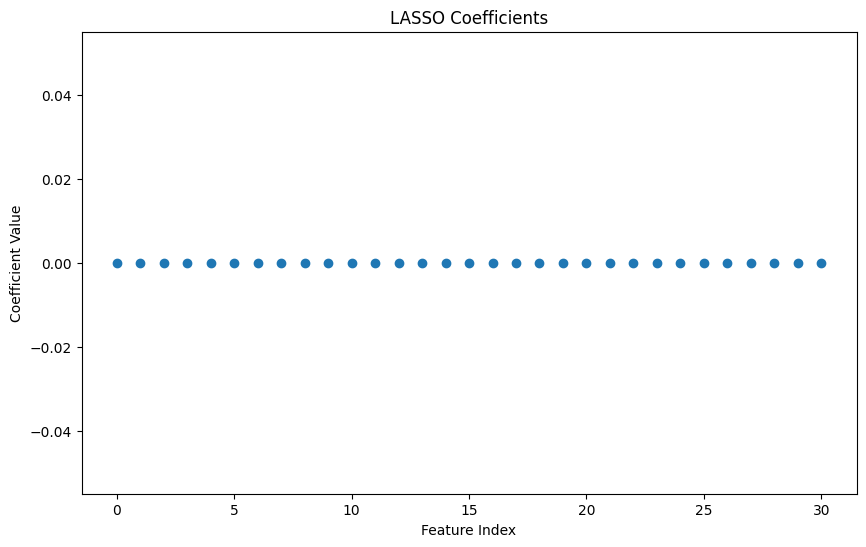

In [145]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression


X = df.drop(columns=["grammes equivalent CO2/km"])
y = df["grammes equivalent CO2/km"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply LASSO
# Choose a value for the regularization parameter alpha
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(tabulate(zip(df.columns, lasso.coef_), headers=['Feature', 'Coefficient']))
# Step 6: Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.plot(lasso.coef_, marker='o', linestyle='none')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('LASSO Coefficients')
plt.show()


### Select best combination

In [146]:
# small code to find the best columns for prediction
from itertools import combinations

# List of 16 column names (example names, replace with actual column names from your DataFrame)
columns = df.columns.difference(["grammes equivalent CO2/km"])
columns_index = {col: index for index, col in enumerate(columns)}

# Generate all possible groups of 4 columns
column_combinations = list(combinations(columns, 4))


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# apprentissage sur les données standardisées

results = {}
X_train, X_test, y_train, y_test = train_test_split(df[columns], df["grammes equivalent CO2/km"], test_size=0.2, random_state=42, shuffle=True)

for cols in column_combinations:
    # get the indexes
    cols_indexes = []
    for col in list(cols):
        cols_indexes.append(columns_index[col])
    
    # deduces X_train and X_dev
    
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    # prédiction et test
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[cols] = mse
    print(f"for columns {cols} the mse is {mse}")

pd.DataFrame(results.items(), columns=["columns", "mse"]).sort_values("mse")

for columns ('Axle Ratio', 'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating', 'DT-Inertia Work Ratio Rating') the mse is 0.00040500985191078525
for columns ('Axle Ratio', 'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating', 'Equivalent Test Weight (kg)') the mse is 0.00040500985191078525
for columns ('Axle Ratio', 'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating', 'Fuel type') the mse is 0.00040500985191078525
for columns ('Axle Ratio', 'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating', 'Gear ratio') the mse is 0.00040500985191078525
for columns ('Axle Ratio', 'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating', 'Model Year') the mse is 0.00040500985191078525
for columns ('Axle Ratio', 'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating', 'N/V Ratio') the mse is 0.00040500985191078525
for columns ('Axle Ratio', 'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating', 'Number of Cylinders and Rotors') the mse is 0.0004050098519107

KeyboardInterrupt: 

In [ ]:
df_results_rf = pd.DataFrame(results.items(), columns=["columns", "mse"]).sort_values("mse")
df_results_rf

In [ ]:
results_rf = {}
for row in df_results_rf[df_results_rf["mse"] < 70].iterrows():
    for col in row[1]["columns"]:
        if col not in results_rf:
            results_rf[col] = []
        results_rf[col].append(row[1]["mse"])

results_rf

# Convert dictionary to DataFrame
df_vis_rf = pd.DataFrame({key: pd.Series(value) for key, value in results_rf.items()})

# Compute average MSE for each column
avg_mse = df_vis_rf.mean()

# Get the number of MSE values for each column
num_mse_values = df_vis_rf.count()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Average MSE': avg_mse, 'Count': num_mse_values})

# Sort by increasing average MSE
plot_data = plot_data.sort_values(by='Average MSE')

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(plot_data.index, plot_data['Count'], color='skyblue')

# Add average MSE values on top of each bar
for bar, mse in zip(bars, plot_data['Average MSE']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            f'{mse:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Labels and title
ax.set_ylabel("Number of MSE Values")
ax.set_xlabel("Feature")
ax.set_title("Average MSE per Feature (Bar Height = MSE Count)")
ax.set_xticklabels(plot_data.index, rotation=45, ha="right")

plt.show()

#### SelectKBest

In [147]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame
X = df.drop(columns=['grammes equivalent CO2/km'])
y = df['grammes equivalent CO2/km']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest with f_regression as the scoring function
selector = SelectKBest(score_func=f_regression, k=5)  # Adjust 'k' as needed

# Fit the selector to the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the boolean mask of selected features
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_features = X.columns[selected_features_mask]
print("Selected Features:", selected_features)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the selected training data
model.fit(X_train_selected, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Selected Features: Index(['Test Veh Displacement (L)', 'Rated Horsepower',
       'Number of Cylinders and Rotors', 'litre pour 100km',
       'Equivalent Test Weight (kg)'],
      dtype='object')
Mean Squared Error: 0.0012124370999239565
R^2 Score: 0.9058276407182175


## Transformation

### Standardization

### Smoothing

### Discretisation

### Feature Construction

## Enregistrement

In [148]:
df.columns

Index(['Model Year', 'Test Veh Displacement (L)', 'Rated Horsepower',
       'Number of Cylinders and Rotors', 'Number of Gears',
       'Transmission Overdrive Code', 'Axle Ratio', 'N/V Ratio',
       'Shift Indicator Light Use Cd', 'Test Procedure Cd',
       'Test Fuel Type Cd', 'DT-Inertia Work Ratio Rating',
       'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating',
       'Target Coef A (lbf)', 'Target Coef B (lbf/mph)',
       'Target Coef C (lbf/mph**2)', 'Set Coef A (lbf)',
       'Set Coef B (lbf/mph)', 'Set Coef C (lbf/mph**2)', 'litre pour 100km',
       'Weight (kg)', 'grammes equivalent CO2/km', 'Fuel type',
       'Number of wheel', 'Equivalent Test Weight (kg)', 'Gear ratio',
       'Veh Mfr Code Mean Encoding', 'Transmission Type Mean Encoding',
       'Rear Type_0.0', 'Rear Type_0.1', 'Rear Type_1.0'],
      dtype='object')

le dataset final doit:
* avoir des distributions normales
* n'avoir que des colonnes apportant de l'information

In [ ]:
df[['Test Veh Displacement (L)', 'Rated Horsepower', 'Number of Cylinders and Rotors', 'litre pour 100km', 'Weight (kg)', 'grammes equivalent CO2/km']].to_csv("./results/df_preprocessed.csv", index=False)
df[['Rated Horsepower', 'Number of Cylinders and Rotors', 'litre pour 100km', 'grammes equivalent CO2/km']].to_csv("./results/df_pipeline.csv", index=False)   

# Pre-processing - Test

In [151]:
# load the test data
# load the model
# apply the model to the test data
